# Import data

In [67]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Set a base output data directory
# Note to examiner: please change this to avoid file not found exceptions
#   when running this notebook.
BASE_DATA_DIR = "/Users/ameliaoberholzer/Documents/AA assignment/New data"

In [4]:
# Load the CSV file(s) as reviews.
GHG = pd.read_csv('AIR_GHG_04112022165809522.csv')

GHG.head()

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425624.307,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425686.445,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,429473.085,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430381.731,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430848.498,NaN,NaN


# Clean data set

In [6]:
# Remove Null Values 
GHG_clean = GHG.dropna(axis=1)
GHG_clean.head()

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,PowerCode Code,PowerCode,Value
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,3,Thousands,425624.307
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,3,Thousands,425686.445
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,3,Thousands,429473.085
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,3,Thousands,430381.731
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,3,Thousands,430848.498


Note green house gases are in the form to the 1000. Moving forward by three decimal place will show the number of CO2 produce by a certain country. 

In [112]:
# Drop unnecessary columns.
GHG_new = GHG_clean.drop(columns=['COU', 'POL', 'Variable', 'YEA', 'Pollutant', 'VAR', 'PowerCode Code', 'PowerCode'])
GHG_new.head()


,Country,Year,Value
0,Australia,1990,425624.307
1,Australia,1991,425686.445
2,Australia,1992,429473.085
3,Australia,1993,430381.731
4,Australia,1994,430848.498


In [113]:
US_GHG = GHG_new.loc[GHG_new["Country"].isin(["United States"])]
US_GHG


,Country,Year,Value
7974,United States,1990,6453450.223
7975,United States,1991,6382938.922
7976,United States,1992,6497290.079
7977,United States,1993,6613395.750
7978,United States,1994,6700778.176
...,...,...,...
70159,United States,2016,0.309
70160,United States,2017,0.302
70161,United States,2018,0.304
70162,United States,2019,0.293


In [114]:
US_GHG_clean = US_GHG.sort_values(by='Value', ascending=False).head(31)
US_GHG_clean

,Country,Year,Value
7991,United States,2007,7463786.407
7989,United States,2005,7434827.939
7988,United States,2004,7428447.644
7990,United States,2006,7360801.267
7984,United States,2000,7327593.209
7987,United States,2003,7313828.082
7986,United States,2002,7259157.149
7992,United States,2008,7240643.548
7985,United States,2001,7219162.974
7983,United States,1999,7138140.713


# Visualise data

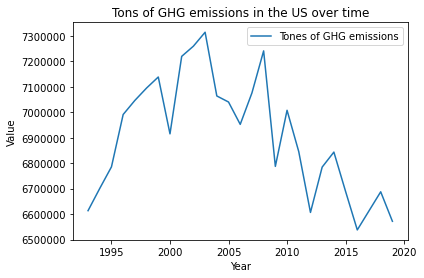

In [115]:
sns.lineplot(
    x="Year",
    y="Value",
    data=US_GHG_clean,
    ci=None,
).set(title="Tons of GHG emissions in the US over time")
plt.ticklabel_format(style="plain", axis="y")
plt.legend(labels=["Tones of GHG emissions"])


# Forecasting Future GHG Emissions

In [116]:
GHG_prep_US = US_GHG_clean.drop(columns=['Country'])
GHG_prep_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 7991 to 35070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    31 non-null     int64  
 1   Value   31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.8 KB


In [117]:
# Change appointment month to date time format
GHG_prep_US["Year"] = pd.to_datetime(GHG_prep_US["Year"], format='%Y')
GHG_prep_US.head()


,Year,Value
7991,2007-01-01,7463786.407
7989,2005-01-01,7434827.939
7988,2004-01-01,7428447.644
7990,2006-01-01,7360801.267
7984,2000-01-01,7327593.209


In [118]:
GHG_prep_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 7991 to 35070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    31 non-null     datetime64[ns]
 1   Value   31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [121]:
GHG_prep_US1 = GHG_prep_US.set_index("Year")
GHG_prep_US2 = GHG_prep_US1.sort_values(by="Year")
GHG_prep_US2

,Value
Year,
1993-01-01,6613395.750
1994-01-01,6700778.176
1995-01-01,6785363.614
1996-01-01,6990925.580
1997-01-01,7046213.088
1998-01-01,7094833.389
1999-01-01,7138140.713
2000-01-01,7327593.209
2000-01-01,6502364.378


In [125]:
# Create the rolling mean and the rolling standard deviation
GHG_US_roll_mean = GHG_prep_US2.rolling(window=12).mean()
GHG_US_roll_sd = GHG_prep_US2.rolling(window=12).std()
print(GHG_US_rolll_mean, GHG_US_rolll_sd)

                   Value
Year                    
1993-01-01           NaN
1994-01-01           NaN
1995-01-01           NaN
1996-01-01           NaN
1997-01-01           NaN
1998-01-01           NaN
1999-01-01           NaN
2000-01-01           NaN
2000-01-01           NaN
2001-01-01           NaN
2002-01-01           NaN
2003-01-01  6.999313e+06
2004-01-01  7.067234e+06
2004-01-01  7.067085e+06
2005-01-01  7.121207e+06
2005-01-01  7.092383e+06
2006-01-01  7.050501e+06
2006-01-01  7.072665e+06
2007-01-01  7.035106e+06
2007-01-01  7.046455e+06
2008-01-01  7.107978e+06
2009-01-01  7.071987e+06
2010-01-01  7.051011e+06
2011-01-01  7.011949e+06
2012-01-01  6.943455e+06
2013-01-01  6.950580e+06
2014-01-01  6.901291e+06
2015-01-01  6.904955e+06
2016-01-01  6.904476e+06
2018-01-01  6.848368e+06
2019-01-01  6.838726e+06                     Value
Year                     
1993-01-01            NaN
1994-01-01            NaN
1995-01-01            NaN
1996-01-01            NaN
1997-01-01         

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation of US GHG')

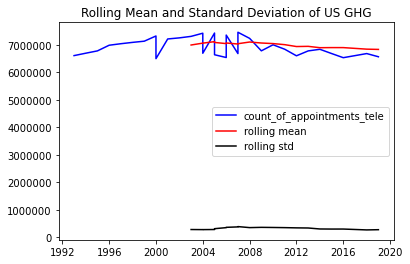

In [126]:
# Plot rolling statistics
# Plot legend
# Move legend to desired location
# Plot title
# Now we can see how the rolling mean changes over time 
orig = plt.plot(
    GHG_prep_US2, color="blue", label="count_of_appointments_tele"
)
mean = plt.plot(GHG_US_roll_mean, color="red", label="rolling mean")
std = plt.plot(GHG_US_roll_sd, color="black", label="rolling std")
plt.ticklabel_format(style="plain", axis="y")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.legend(loc="best")
plt.title(
    "Rolling Mean and Standard Deviation of US GHG"
)


In [127]:
# Drop na values
GHG_US_roll_mean.dropna(inplace=True)
GHG_US_roll_mean

,Value
Year,
2003-01-01,6.999313e+06
2004-01-01,7.067234e+06
2004-01-01,7.067085e+06
2005-01-01,7.121207e+06
2005-01-01,7.092383e+06
2006-01-01,7.050501e+06
2006-01-01,7.072665e+06
2007-01-01,7.035106e+06
2007-01-01,7.046455e+06


In [128]:
# Simiple Exponential Smoothing Model with Alpha = 0.2
fcast_US_GHG = Holt(GHG_US_roll_mean).fit(smoothing_level=0.2)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [129]:
# Find the fitted values
fcast_US_GHG.fittedvalues

Year
2003-01-01    7.067234e+06
2004-01-01    7.118922e+06
2004-01-01    7.171841e+06
2005-01-01    7.210060e+06
2005-01-01    7.247995e+06
2006-01-01    7.266510e+06
2006-01-01    7.264520e+06
2007-01-01    7.259879e+06
2007-01-01    7.239888e+06
2008-01-01    7.218622e+06
2009-01-01    7.209598e+06
2010-01-01    7.189814e+06
2011-01-01    7.164378e+06
2012-01-01    7.130272e+06
2013-01-01    7.082003e+06
2014-01-01    7.039687e+06
2015-01-01    6.990579e+06
2016-01-01    6.948686e+06
2018-01-01    6.913352e+06
2019-01-01    6.871328e+06
dtype: float64

In [131]:
# Choose number of predictions
# Round answer
US_GHG_future = fcast_US_GHG.forecast(50)
US_GHG_future.round()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


20    6834510.0
21    6804212.0
22    6773913.0
23    6743615.0
24    6713317.0
25    6683019.0
26    6652721.0
27    6622423.0
28    6592124.0
29    6561826.0
30    6531528.0
31    6501230.0
32    6470932.0
33    6440634.0
34    6410335.0
35    6380037.0
36    6349739.0
37    6319441.0
38    6289143.0
39    6258845.0
40    6228546.0
41    6198248.0
42    6167950.0
43    6137652.0
44    6107354.0
45    6077056.0
46    6046758.0
47    6016459.0
48    5986161.0
49    5955863.0
50    5925565.0
51    5895267.0
52    5864969.0
53    5834670.0
54    5804372.0
55    5774074.0
56    5743776.0
57    5713478.0
58    5683180.0
59    5652881.0
60    5622583.0
61    5592285.0
62    5561987.0
63    5531689.0
64    5501391.0
65    5471092.0
66    5440794.0
67    5410496.0
68    5380198.0
69    5349900.0
dtype: float64

Text(0.5, 1.0, 'How US GHG emissions will change over the next 50 years')

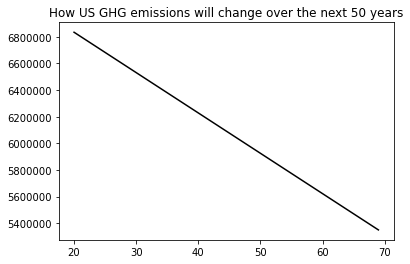

In [132]:
# Plot the forecast
# Set desired title
# Set y axis in readable format
US_GHG_future = plt.plot(
    US_GHG_future, color="black", label="forecasting_mean_US_GHG"
)
plt.ticklabel_format(style="plain", axis="y")
plt.title(
    "How US GHG emissions will change over the next 50 years"
)

The question is whether the reduction is enough. 